# Model Comparison Notebook
This notebook handles:
- Comparing Different Models Best Results
- Comparing Different Parameters for the Same Model


## Different Models

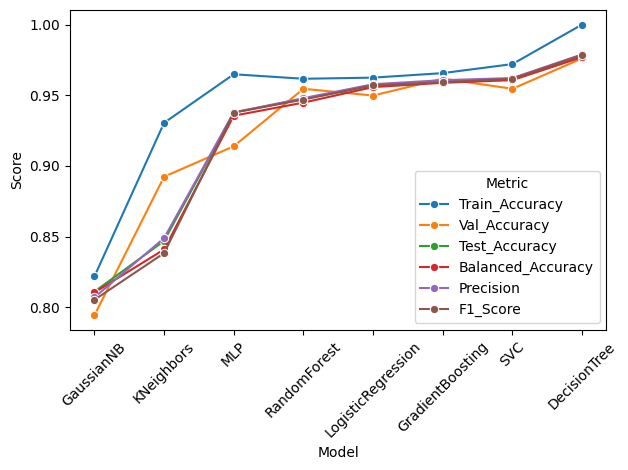

In [1]:
import joblib

trained_models_evaluator = joblib.load("utils/model_evaluator.pkl")
trained_models_evaluator.line_plot(filename="Models_Accuracy")

## Same Model, Different Parameters

In [2]:
param_grid = joblib.load("utils/param_grid.pkl")
param_grid = dict(param_grid.items())  # Redundant line for the ide to know the type
param_grid

{'GaussianNB': {'var_smoothing': [1e-09, 1e-06, 0.001, 0.01, 0.1],
  'best_params': {'var_smoothing': 0.01}},
 'LogisticRegression': {'C': [0.1, 1.0, 10], 'best_params': {'C': 10}},
 'KNeighbors': {'n_neighbors': [3, 5, 7], 'best_params': {'n_neighbors': 3}},
 'DecisionTree': {'max_depth': [3, 5, 7], 'best_params': {'max_depth': 7}},
 'SVC': {'kernel': ['poly', 'rbf', 'linear'],
  'C': [0.5, 1.0, 1.5],
  'best_params': {'C': 1.5, 'kernel': 'linear'}},
 'RandomForest': {'ccp_alpha': [0.01, 0.04, 0.09],
  'best_params': {'ccp_alpha': 0.01}},
 'GradientBoosting': {'learning_rate': [0.01, 0.04, 0.09],
  'ccp_alpha': [0.01, 0.04, 0.09],
  'best_params': {'ccp_alpha': 0.01, 'learning_rate': 0.01}},
 'MLP': {'hidden_layer_sizes': [(100,), (50, 50), (25, 10, 5)],
  'best_params': {'hidden_layer_sizes': (50, 50)}}}

In [3]:
from Model_Evaluation import ModelsEvaluator


def evaluate_parameters(model_name: str):
    model_params = param_grid.pop(model_name)
    best_params = model_params.pop("best_params")
    params_count = len(model_params)
    model = joblib.load(f"models/{model_name}.pkl")
    for param in model_params:
        model_evaluator = ModelsEvaluator()
        if params_count == 1:
            for value in model_params[param]:
                model.set_params(**{param: value})
                model_evaluator.evaluate(f"{value}", model)
        else:
            other_params = dict()
            for other_param in best_params:
                if other_param != param:
                    other_params[other_param] = best_params[other_param]
            for value in model_params[param]:
                model.set_params(**{param: value, **other_params})
                model_evaluator.evaluate(value, model)
        model_evaluator.line_plot(x=f"{model_name}_{param}", filename=f"{model_name}_{param}")

### Gaussian Naive Bayes Classifier

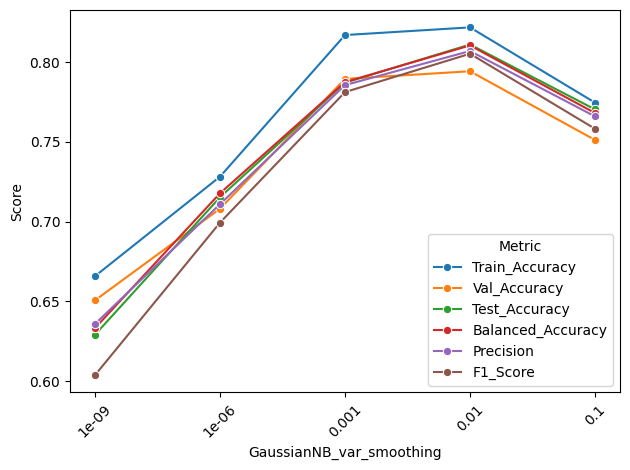

In [4]:
evaluate_parameters("GaussianNB")

### Logistic Regression Classifier

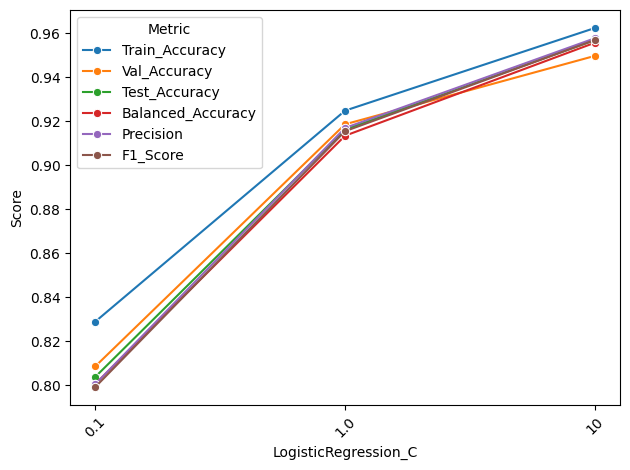

In [5]:
evaluate_parameters("LogisticRegression")

### K-Nearest Neighbors Classifier

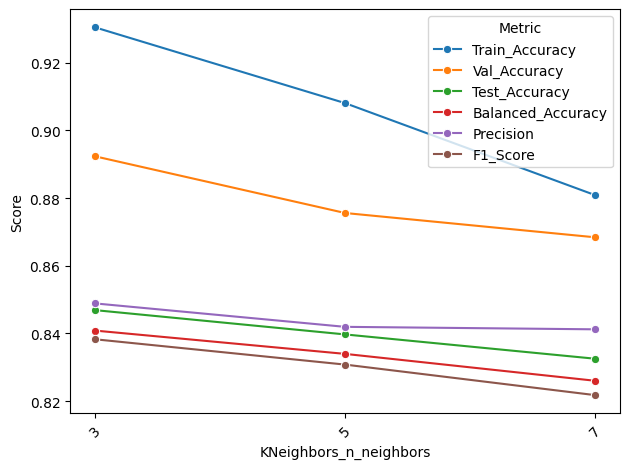

In [6]:
evaluate_parameters("KNeighbors")

### Decision Tree Classifier

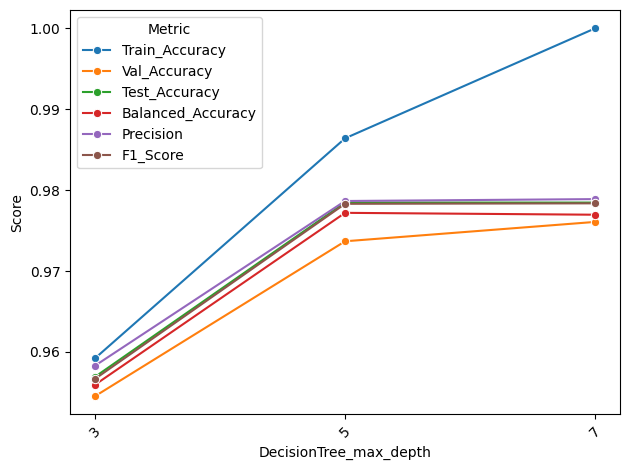

In [7]:
evaluate_parameters("DecisionTree")

### Support Vector Classifier

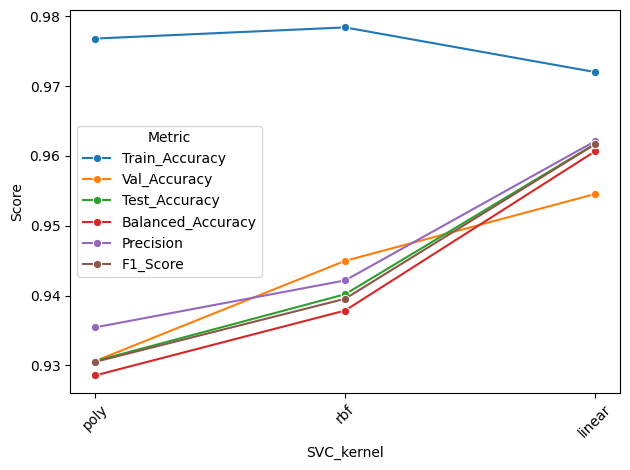

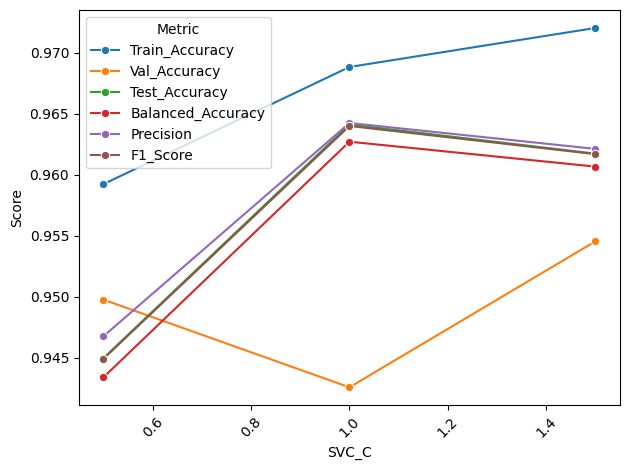

In [8]:
evaluate_parameters("SVC")

### Random Forest Classifier

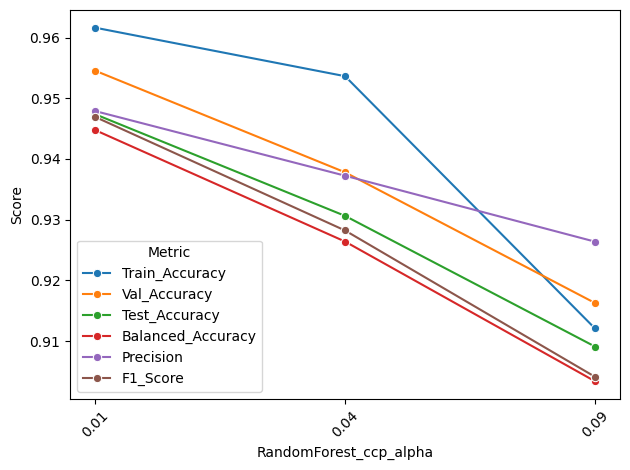

In [9]:
evaluate_parameters("RandomForest")

### Gradient Boosting Classifier

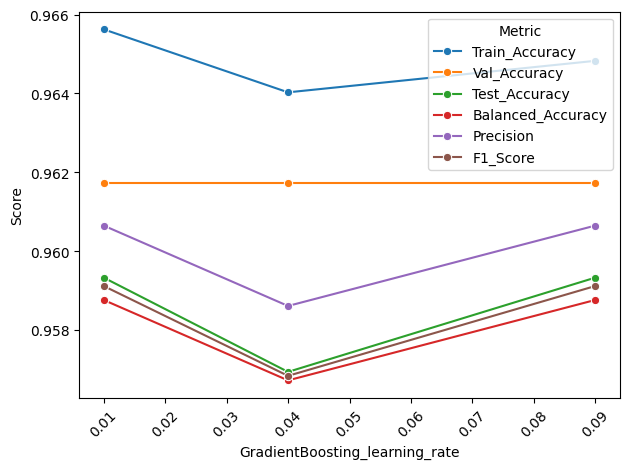

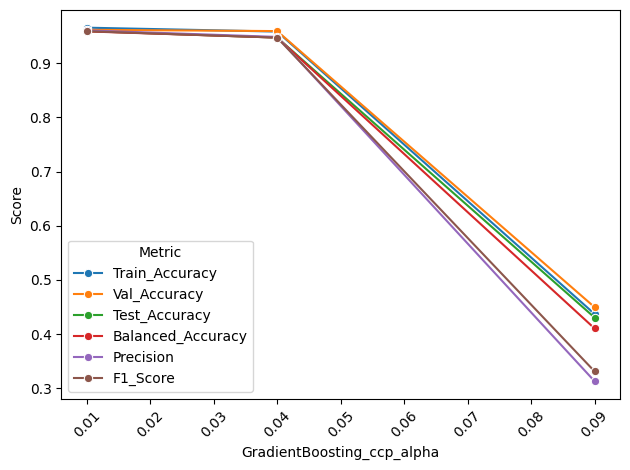

In [10]:
evaluate_parameters("GradientBoosting")

### Multilayer Perceptron Classifier

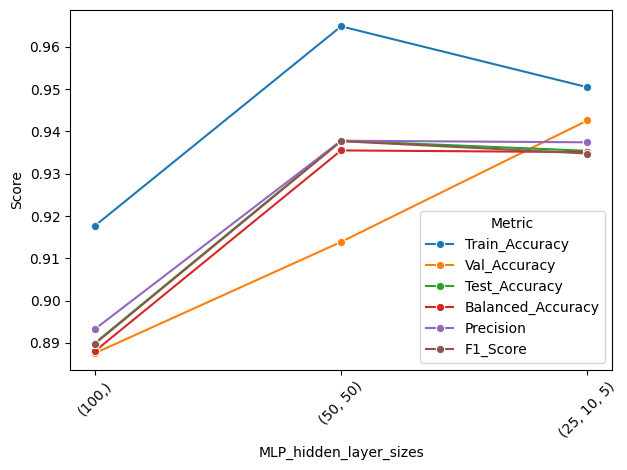

In [11]:
evaluate_parameters("MLP")